# Mastercard Stock Data From 2006 - 2023
The Mastercard's stock data were obtained from the Yahoo! Finance website. The link is [here](https://finance.yahoo.com/quote/MA/history?period1=1148515200&period2=1680652800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true). The data contain records of the stock values, which include dates and values for open, high, low, close, adjusted close, and volume. The data were collected on a daily basis (Mondays to Fridays with the exception of the holidays) from 2006 - 2023. My goal is to evaluate the Random Forest Regression model's predictive capability on the Mastercard's stock data. <b>Disclaimer:</b> Please do not use my project to make any sort of investment or other finance-related decisions. This project is <b>only</b> for learning about machine learning algorithms. 

---
#### What is Random Forest and why? 
According to [IBM](https://www.ibm.com/topics/random-forest), "Random forest is a commonly-used machine learning algorithm trademarked by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems". In other words, it's a model that takes in many diverse factors to reach a result.

In [2]:
#import basic components
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

#import data
masterData = pd.read_csv("MA.csv")
masterData

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-05-25,4.030000,4.605000,4.020000,4.600000,4.247398,395343000
1,2006-05-26,4.630000,4.674000,4.411000,4.493000,4.148600,103044000
2,2006-05-30,4.497000,4.498000,4.285000,4.400000,4.062730,49898000
3,2006-05-31,4.435000,4.536000,4.435000,4.494000,4.149524,30002000
4,2006-06-01,4.493000,4.810000,4.490000,4.751000,4.386825,62344000
...,...,...,...,...,...,...,...
4239,2023-03-29,357.380005,360.029999,355.820007,359.529999,359.529999,2327000
4240,2023-03-30,360.950012,362.589996,358.239990,359.260010,359.260010,2480500
4241,2023-03-31,361.130005,363.649994,360.380005,363.410004,363.410004,3376600
4242,2023-04-03,362.609985,366.660004,361.750000,366.470001,366.470001,2978000


The data have 4244 entries and 7 columns. 

In [3]:
#info on each column and entry
masterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4244 entries, 0 to 4243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4244 non-null   object 
 1   Open       4244 non-null   float64
 2   High       4244 non-null   float64
 3   Low        4244 non-null   float64
 4   Close      4244 non-null   float64
 5   Adj Close  4244 non-null   float64
 6   Volume     4244 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 232.2+ KB


There are 4244 elements in total for each column, which means nothing is missing. The date column is currently set to object as a data type, which is not ideal when making graphs. Jupyter notebook won't display graphs properly if I don't convert that data type. The date column will be converted to datetime, which is another data type. 

In [4]:
#convert object to datetime for date column
masterData['Date'] = pd.to_datetime(masterData['Date'])
masterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4244 entries, 0 to 4243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4244 non-null   datetime64[ns]
 1   Open       4244 non-null   float64       
 2   High       4244 non-null   float64       
 3   Low        4244 non-null   float64       
 4   Close      4244 non-null   float64       
 5   Adj Close  4244 non-null   float64       
 6   Volume     4244 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 232.2 KB


## Exploratory Data Analysis (EDA)
From [IBM](https://www.ibm.com/topics/exploratory-data-analysis), "Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions". EDA is the first step to take to determine how to best use the data set to accomplish a goal. 

For this project, the values for adjusted close will carry more importance than the closing price. According to [The Balance](https://www.thebalancemoney.com/what-is-adjusted-closing-price-5190242), "the closing price simply tells you how much the stock was trading for at the end of any given trading day. The adjusted closing price updates that information to reflect events such as dividend payouts and stock splits. Because adjusted closing price accounts for information that isn't included in the closing price, it's considered a more accurate representation than closing price". 

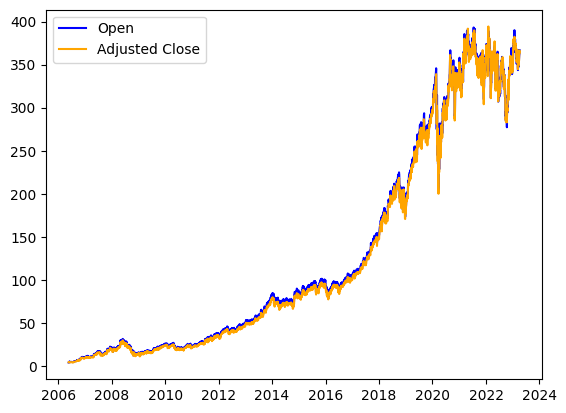

In [5]:
plt.plot(masterData['Date'], masterData["Open"], '-b', label = "Open")
plt.plot(masterData['Date'], masterData["Adj Close"], '-', color = "orange", label = "Adjusted Close")
plt.legend()
plt.show()

The adjusted close values increased exponentially from 2017 to 2021. The data pointed to many factors outside of the data set that contributed to the exponential increase.

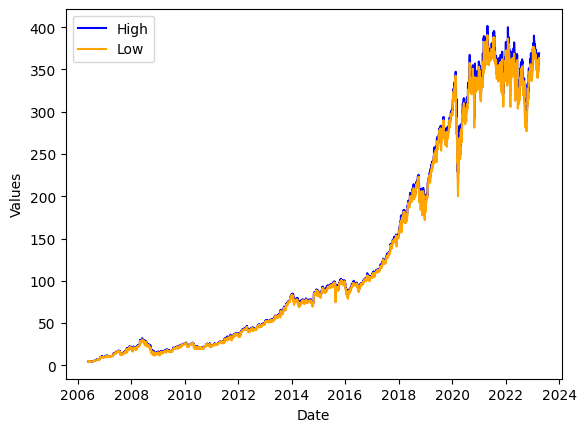

In [6]:
plt.plot(masterData['Date'], masterData['High'], '-b', label = "High")
plt.plot(masterData['Date'], masterData['Low'], '-', color = "orange", label = "Low")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.show()

Values for high and low also display strong similarity.

In [7]:
#convert datetime to str
masterData['dateStr'] = masterData['Date'].astype(str)
masterData.info()

#seperate date into year, month, and date
masterData[['year', 'month', 'day']] = masterData['dateStr'].str.split("-", expand=True)
masterData

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4244 entries, 0 to 4243
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4244 non-null   datetime64[ns]
 1   Open       4244 non-null   float64       
 2   High       4244 non-null   float64       
 3   Low        4244 non-null   float64       
 4   Close      4244 non-null   float64       
 5   Adj Close  4244 non-null   float64       
 6   Volume     4244 non-null   int64         
 7   dateStr    4244 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 265.4+ KB


,Date,Open,High,Low,Close,Adj Close,Volume,dateStr,year,month,day
0,2006-05-25,4.030000,4.605000,4.020000,4.600000,4.247398,395343000,2006-05-25,2006,05,25
1,2006-05-26,4.630000,4.674000,4.411000,4.493000,4.148600,103044000,2006-05-26,2006,05,26
2,2006-05-30,4.497000,4.498000,4.285000,4.400000,4.062730,49898000,2006-05-30,2006,05,30
3,2006-05-31,4.435000,4.536000,4.435000,4.494000,4.149524,30002000,2006-05-31,2006,05,31
4,2006-06-01,4.493000,4.810000,4.490000,4.751000,4.386825,62344000,2006-06-01,2006,06,01
...,...,...,...,...,...,...,...,...,...,...,...
4239,2023-03-29,357.380005,360.029999,355.820007,359.529999,359.529999,2327000,2023-03-29,2023,03,29
4240,2023-03-30,360.950012,362.589996,358.239990,359.260010,359.260010,2480500,2023-03-30,2023,03,30
4241,2023-03-31,361.130005,363.649994,360.380005,363.410004,363.410004,3376600,2023-03-31,2023,03,31
4242,2023-04-03,362.609985,366.660004,361.750000,366.470001,366.470001,2978000,2023-04-03,2023,04,03


In [8]:
masterData = masterData.drop(columns=['Date', 'dateStr'])
masterData

,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,4.030000,4.605000,4.020000,4.600000,4.247398,395343000,2006,05,25
1,4.630000,4.674000,4.411000,4.493000,4.148600,103044000,2006,05,26
2,4.497000,4.498000,4.285000,4.400000,4.062730,49898000,2006,05,30
3,4.435000,4.536000,4.435000,4.494000,4.149524,30002000,2006,05,31
4,4.493000,4.810000,4.490000,4.751000,4.386825,62344000,2006,06,01
...,...,...,...,...,...,...,...,...,...
4239,357.380005,360.029999,355.820007,359.529999,359.529999,2327000,2023,03,29
4240,360.950012,362.589996,358.239990,359.260010,359.260010,2480500,2023,03,30
4241,361.130005,363.649994,360.380005,363.410004,363.410004,3376600,2023,03,31
4242,362.609985,366.660004,361.750000,366.470001,366.470001,2978000,2023,04,03


## Algorithms Used for Traders
From Investopedia's ["Using Technical Indicators to Develop Trading Strategies"](https://www.investopedia.com/articles/trading/11/indicators-and-strategies-explained.asp), "indicators, such as moving averages and Bollinger Bands, are mathematically-based technical analysis tools that traders and investors use to analyze the past and anticipate future price trends and patterns. Where fundamentalists may track economic data, annual reports, or various other measures of corporate profitability, technical traders rely on charts and indicators to help interpret price moves. The goal when using indicators is to identify trading opportunities". See [here](https://www.investopedia.com/terms/t/technicalindicator.asp) for more information on technical indicators. The project will use 15-day moving average and on-balance volume. 

---
#### A Note About Using Technical Indicators for Long Term Investing
The Motley Fool mentioned in an article, ["Technical Analysis for the Long-Term Investor"](https://www.fool.com/investing/how-to-invest/stocks/technical-analysis/), that it "does not use technical analysis to predict stock price movements". The article continued, "Technical analysis might have merit for some traders, but the most sustainable path to achieving long-term investing success does not include short-term chart reading. Focusing on fundamentals such as revenue and profit growth - indicators that a company operates in an industry with above-average growth -- or on signs that a company has a competitive advantage are all consistent with long-term wealth building". Please note that long term stock prices are dependent on a company's fundamentals such as profits and investment in its business. 

In [9]:
#acquire 15 day moving average - https://www.learnpythonwithrune.org/simple-and-exponential-moving-average-with-python-and-pandas/
masterData['MA15'] = masterData['Close'].rolling(15).mean().fillna(0)

#acquire on-balance volume - https://medium.com/wwblog/implement-the-on-balance-volume-obv-indicator-in-python-10ac889efe72
masterData['OBV'] = masterData['Close'].diff() * masterData['Volume'].fillna(0).cumsum()

#replace nan values with 0
masterData.fillna(0, inplace=True)

#return masterData
masterData

,Open,High,Low,Close,Adj Close,Volume,year,month,day,MA15,OBV
0,4.030000,4.605000,4.020000,4.600000,4.247398,395343000,2006,05,25,0.000000,0.000000e+00
1,4.630000,4.674000,4.411000,4.493000,4.148600,103044000,2006,05,26,0.000000,-5.332741e+07
2,4.497000,4.498000,4.285000,4.400000,4.062730,49898000,2006,05,30,0.000000,-5.099050e+07
3,4.435000,4.536000,4.435000,4.494000,4.149524,30002000,2006,05,31,0.000000,5.435898e+07
4,4.493000,4.810000,4.490000,4.751000,4.386825,62344000,2006,06,01,0.000000,1.646422e+08
...,...,...,...,...,...,...,...,...,...,...,...
4239,357.380005,360.029999,355.820007,359.529999,359.529999,2327000,2023,03,29,351.614665,2.549344e+11
4240,360.950012,362.589996,358.239990,359.260010,359.260010,2480500,2023,03,30,351.935999,-1.323708e+10
4241,361.130005,363.649994,360.380005,363.410004,363.410004,3376600,2023,03,31,353.022666,2.034808e+11
4242,362.609985,366.660004,361.750000,366.470001,366.470001,2978000,2023,04,03,354.473334,1.500456e+11


# Data Preparation for Random Forest Regression Model
Prior to using random forest model, the data will be split into "features" and a "target". Features contain variables that one picks for the model to use to generate a result. Target contains a variable that the user wishes to predict. In this case, the features will have all the columns except adj close. The target will have only adj close. 

In [10]:
# identify features and target
features = masterData.drop('Adj Close', axis=1)
target = masterData['Adj Close']

# Random Forest Regression Model
I'll split the dataset into training set to train the model and test set to evaluate the model. The training set will contain 80% of the data and the test set will contain 20% of the data. From there, I'll calculate the loss between the target value from the actual testing set and the values predicted by the model known as the Root Mean Squared Error (RMSE). I'll also calculate the Mean Absolute Percentage Error, which "measures the accuracy of a model" (quote taken from [Datagy](https://datagy.io/mape-python/)). 

In [11]:
#import necessary libraries for splitting data, calculating mean squared error, and using the Random Forest Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# identify training and test sets from the data
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# initialize the model with 6000 decision trees
randomForest = RandomForestRegressor(n_estimators=6000, random_state=42)

# fit the model
randomForest.fit(features_train, target_train)

RandomForestRegressor(n_estimators=6000, random_state=42)

In [12]:
# prediction time
target_pred = randomForest.predict(features_test)

#calculate rmse
rmse1 = float(format(np.sqrt(mean_squared_error(target_test, target_pred)), '.3f'))
print("RMSE: ", rmse1)

RMSE:  0.534


In [13]:
# calculate Mean Absolute Error
from sklearn.metrics import mean_absolute_percentage_error
error1 = mean_absolute_percentage_error(target_test, target_pred)
print("Mean absolute percentage error: ", round(error1, 2))

Mean absolute percentage error:  0.0


Lastly, I'll calculate r-squared, which "shows how well the data fit the regression model" (quote obtained from [CFI](https://corporatefinanceinstitute.com/resources/data-science/r-squared/)).

In [14]:
# calculate adjusted R-squared
from sklearn.metrics import r2_score
r2 = r2_score(target_test.values.ravel(), target_pred)
print('R-squared: ', round(r2, 2))

R-squared:  1.0


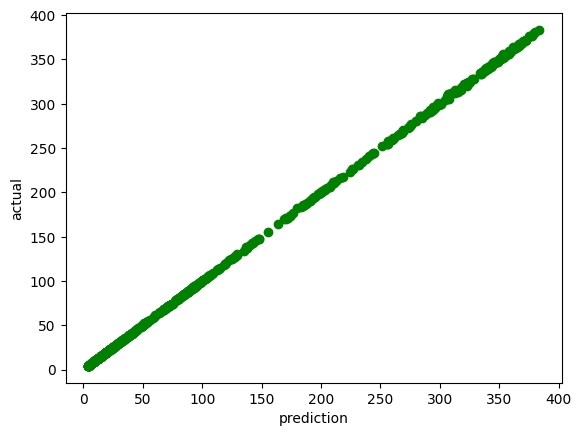

In [19]:
#plot target_pred vs target_test
plt.plot(target_pred, target_test, "o", c = "green")
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

The RMSE is high, but the rest of them are good. On the `actual` vs `prediction` graph, the graph forms into a perfect straight line that goes up, which means I've overfitted the data. In other words, I've created a model that tests well in sample, but has little predictive value. The actual values between `open`, `close`, `high`, `low`, and `close` are very similar to `Adj Close`. Therefore, the model isn't able to make predicted values. It's worth noting that none of the features are contributing to the values for `Adj Close`. The results will not make sense if one is not able to identify how features can possibly contribute to the values for a target. 

## Takeaways
Volatility play a major role in the company's stock price, but there are other factors that are worth noting. A company's profits, investment in its business, economic conditions, investors' sentiments, company's performance, market conditions, etc. all have contributed to the company's stock price, which are what makes stock prices notoriously hard to predict. An article published by the TIME magazine offered more insights into how diverse factors contribute to stock prices for listed companies. The link is [here](https://time.com/personal-finance/article/how-are-stock-prices-determined/). 

At the current time, Mastercard is very profitable, but there is a lot of fear concerning a possible economic turn down. This means the investor is using possible fear of the future to drive today's prices in general. Fear is not part of the Random Forest model and neither is sentiment. Both fear and sentiment are not quantifiable. The rule of thumb is if an individual wants to analyze a stock price properly to accomplish a goal, the individual would need to have relevant data first. The project is a gentle reminder that as much as one needs to focus on finding the right model for a data, achieving a dataset that contains relevant factors is critical in order to have actual results. 